In [41]:
import pandas as pd
from pandas import read_csv
crimes = read_csv("crime.csv")

In [4]:
print(type(crimes))

<class 'pandas.core.frame.DataFrame'>


In [5]:

print(crimes.head(5))

   INCIDENT_ID        OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2016461725  2016461725549900          5499                       0   
1   2016102596  2016102596544100          5441                       0   
2   2016361998  2016361998230500          2305                       0   
3   2016376067  2016376067544100          5441                       0   
4   2016292275  2016292275240400          2404                       0   

            OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
0                traf-other          all-other-crimes  7/21/2016 6:40:00 PM   
1          traffic-accident          traffic-accident  2/17/2016 6:00:00 PM   
2  theft-items-from-vehicle  theft-from-motor-vehicle  6/9/2016 12:28:00 AM   
3          traffic-accident          traffic-accident  6/15/2016 4:43:00 PM   
4    theft-of-motor-vehicle                auto-theft  5/10/2016 3:00:00 PM   

   LAST_OCCURRENCE_DATE         REPORTED_DATE                INCIDENT_ADDRESS  \

In [6]:
print(crimes.shape)


(470414, 19)


In [7]:
s = crimes[['REPORTED_DATE','OFFENSE_TYPE_ID']]
print(s.head())

          REPORTED_DATE           OFFENSE_TYPE_ID
0  7/21/2016 7:09:00 PM                traf-other
1  2/17/2016 6:00:00 PM          traffic-accident
2   6/9/2016 5:45:00 PM  theft-items-from-vehicle
3  6/15/2016 6:20:00 PM          traffic-accident
4  5/10/2016 3:50:00 PM    theft-of-motor-vehicle


In [8]:
crime_count = pd.DataFrame(s.groupby('OFFENSE_TYPE_ID').size().sort_values(ascending=False).rename('counts').reset_index())

In [9]:
print(crime_count.head())

                OFFENSE_TYPE_ID  counts
0              traffic-accident   77514
1  traffic-accident-hit-and-run   33529
2        theft-of-motor-vehicle   31352
3      theft-items-from-vehicle   29630
4                    traf-other   25290


In [10]:
crime_count.shape

(200, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

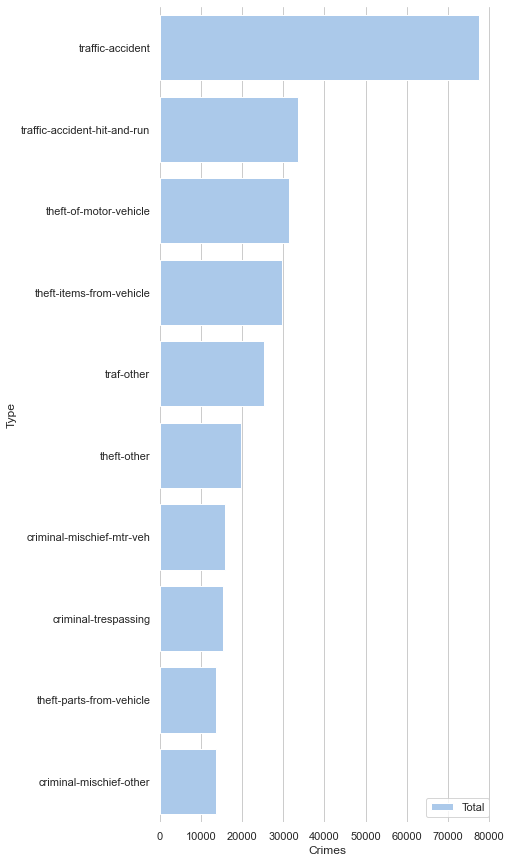

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the plot figure
fig, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes('pastel')
sns.barplot(x = 'counts', y = 'OFFENSE_TYPE_ID', data = crime_count.iloc[:10, :], label = 'Total', color = 'b')

ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = 'Type', xlabel = 'Crimes')
sns.despine(left = True, bottom = True)

# Add a legend and informative axis label
plt.show

In [13]:
n = crimes[['NEIGHBORHOOD_ID']]
print(n.head())

   NEIGHBORHOOD_ID
0   elyria-swansea
1        sunnyside
2        stapleton
3    union-station
4  university-park


In [14]:
nbrhd = pd.DataFrame(n.groupby('NEIGHBORHOOD_ID').size().sort_values(ascending=False).rename('counts').reset_index())

In [15]:
print(nbrhd.head())

  NEIGHBORHOOD_ID  counts
0     five-points   25460
1    central-park   19233
2    capitol-hill   17020
3       montbello   15930
4             cbd   15915


In [16]:
nbrhd.shape

(79, 2)

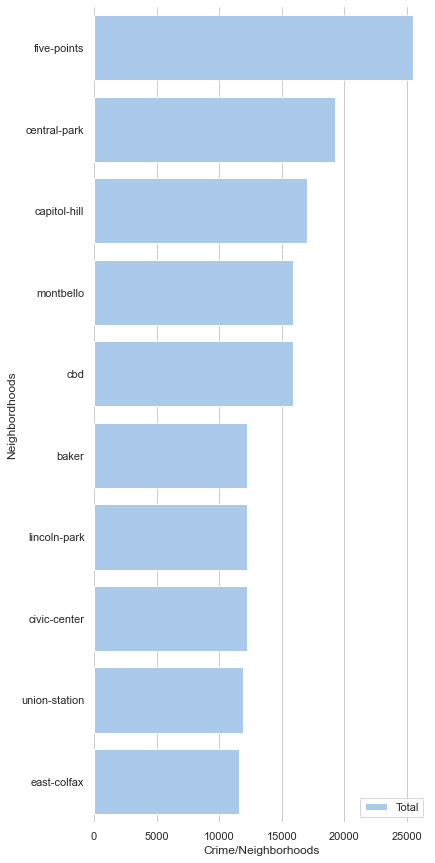

In [49]:
#Initialize the plot figure
fig, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes('pastel')
sns.barplot(x = 'counts', y = 'NEIGHBORHOOD_ID', data = nbrhd.iloc[:10, :], label = 'Total', color = 'b')

ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = 'Neighbordhoods', xlabel = 'Crime/Neighborhoods')
sns.despine(left = True, bottom = True)

# Add a legend and informative axis label
plt.show()

In [42]:
crimesDay = crimes[['ReportedDay']]
print(crimesDay.head())


  ReportedDay
0     07-2016
1     02-2016
2     06-2016
3     06-2016
4     05-2016


In [45]:
rd = pd.DataFrame(crimesDay.groupby('ReportedDay').size().sort_values(ascending=False).rename('counts').reset_index())

In [46]:
print(rd.head())

  ReportedDay  counts
0     08-2017    8728
1     05-2018    8505
2     08-2018    8455
3     07-2018    8431
4     08-2019    8374


In [47]:
rd.shape

(63, 2)

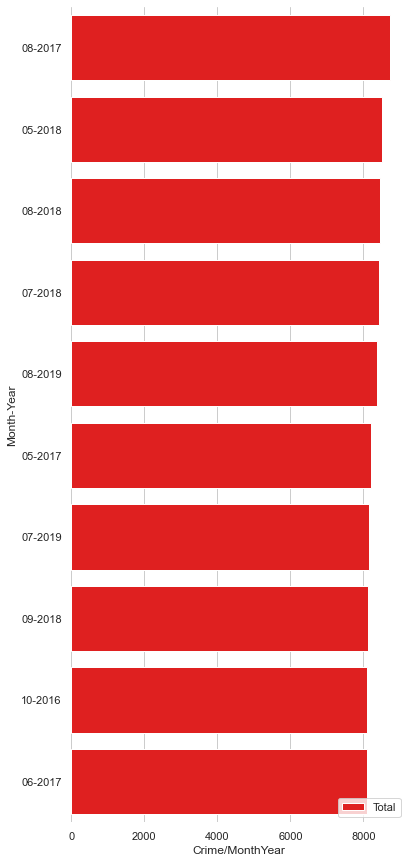

In [51]:
#Initialize the plot figure
fig, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes('pastel')
sns.barplot(x = 'counts', y = 'ReportedDay', data = rd.iloc[:10, :], label = 'Total', color = 'red')

ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = 'Month-Year', xlabel = 'Crime/MonthYear')
sns.despine(left = True, bottom = True)

# Add a legend and informative axis label
plt.show()